In [3]:
import os 
import geopandas as gpd
import pandas as pd
import rasterio
from osgeo import gdal
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from rasterio.plot import show

In [48]:
os.chdir("/home/jovyan/MSC_Thesis/MSc_Thesis_2023")

In [111]:
yield_2021 = gpd.read_file("Output/yield_val/yield_2021.shp")

<AxesSubplot: >

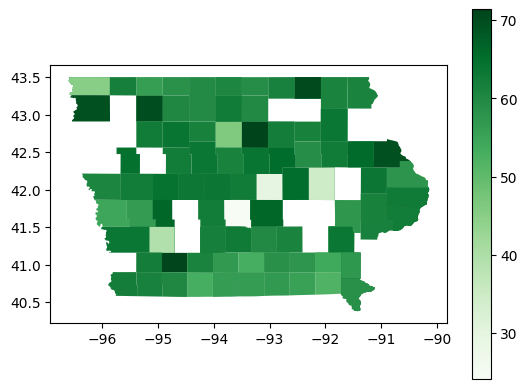

In [193]:
y2021_iowa = yield_2021[yield_2021['STATE_NAME'] == 'Iowa']
y2021_iowa.plot(column='Value',legend=True,cmap='Greens')

In [198]:
y2021_iowa.query('County=="WARREN"')

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,Region,watershed_,Watershed,Commodity,Data Item,Domain,Domain Cat,Value,CV (%),geometry
323,19,181,00465279,0500000US19181,19181,WARREN,Warren County,IA,Iowa,06,...,None,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,62.9,3.8,"POLYGON ((-93.79061 41.51192, -93.54824 41.511..."


In [114]:
# import os
# from itertools import product
# import rasterio as rio
# from rasterio import windows

# in_path = 'Input/sentinel/2021/'
# input_filename = 'clipped_sentinel2_2021_v2.tif'

# out_path = 'Input/sentinel/2021/tiles2'
# output_filename = 'tile_{}-{}.tif'

# def get_tiles(ds, width=1500, height=1500):
#     nols, nrows = ds.meta['width'], ds.meta['height']
#     offsets = product(range(0, nols, width), range(0, nrows, height))
#     big_window = windows.Window(col_off=0, row_off=0, width=nols, height=nrows)
#     for col_off, row_off in  offsets:
#         window =windows.Window(col_off=col_off, row_off=row_off, width=width, height=height).intersection(big_window)
#         transform = windows.transform(window, ds.transform)
#         yield window, transform


# with rio.open(os.path.join(in_path, input_filename)) as inds:
#     tile_width, tile_height = 1500, 1500

#     meta = inds.meta.copy()

#     for window, transform in get_tiles(inds):
#         print(window)
#         meta['transform'] = transform
#         meta['width'], meta['height'] = window.width, window.height
#         outpath = os.path.join(out_path,output_filename.format(int(window.col_off), int(window.row_off)))
#         with rio.open(outpath, 'w', **meta) as outds:
#             outds.write(inds.read(window=window))

In [3]:
# sent2_2021 = sentinel_clipped_2021.read()

In [97]:
crop_yield = gpd.read_file("Input/soybean_yield/soybean_yield_county_level.csv")

In [98]:
crop_yield.head()


,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%),geometry
0,SURVEY,2021,YEAR,,COUNTY,ILLINOIS,17,CENTRAL,40,DE WITT,...,,00000000,,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,69.6,1.9,None
1,SURVEY,2021,YEAR,,COUNTY,ILLINOIS,17,CENTRAL,40,MACON,...,,00000000,,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,73.3,1.8,None
2,SURVEY,2021,YEAR,,COUNTY,ILLINOIS,17,CENTRAL,40,MASON,...,,00000000,,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,63.9,3.8,None
3,SURVEY,2021,YEAR,,COUNTY,ILLINOIS,17,CENTRAL,40,MCLEAN,...,,00000000,,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,66.5,3.1,None
4,SURVEY,2021,YEAR,,COUNTY,ILLINOIS,17,CENTRAL,40,MENARD,...,,00000000,,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,64.6,3.7,None


In [99]:
crop_yield2021 = crop_yield[crop_yield['Year'] == '2021']

In [83]:
# sent2_2021.shape

In [100]:
county_bdry = gpd.read_file("Input/county_boundary/county_layer.shp")

In [101]:
county_bdry.shape

(473, 13)

In [102]:
county_bdry.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,31,157,00835900,0500000US31157,31157,Scotts Bluff,Scotts Bluff County,NE,Nebraska,06,1915576079,15402683,"POLYGON ((-104.05293 41.90614, -104.05299 41.9..."
1,17,009,00424206,0500000US17009,17009,Brown,Brown County,IL,Illinois,06,791828626,4144346,"POLYGON ((-90.91653 39.91662, -90.91470 39.930..."
2,19,135,00465256,0500000US19135,19135,Monroe,Monroe County,IA,Iowa,06,1123296138,1522790,"POLYGON ((-93.09922 41.16087, -92.86977 41.161..."
3,31,159,00835901,0500000US31159,31159,Seward,Seward County,NE,Nebraska,06,1479995692,11542537,"POLYGON ((-97.36812 41.04695, -96.91094 41.046..."
4,19,027,00465203,0500000US19027,19027,Carroll,Carroll County,IA,Iowa,06,1474877210,2145349,"POLYGON ((-95.09085 42.21041, -94.85841 42.209..."


In [103]:
county_bdry.geometry

0      POLYGON ((-104.05293 41.90614, -104.05299 41.9...
1      POLYGON ((-90.91653 39.91662, -90.91470 39.930...
2      POLYGON ((-93.09922 41.16087, -92.86977 41.161...
3      POLYGON ((-97.36812 41.04695, -96.91094 41.046...
4      POLYGON ((-95.09085 42.21041, -94.85841 42.209...
                             ...                        
468    POLYGON ((-90.31733 42.19365, -89.91977 42.196...
469    POLYGON ((-86.06257 41.76053, -86.04103 41.760...
470    POLYGON ((-86.68142 38.39477, -86.61478 38.395...
471    POLYGON ((-93.32962 44.79109, -93.25187 44.811...
472    POLYGON ((-94.26113 45.28394, -94.25666 45.306...
Name: geometry, Length: 473, dtype: geometry

In [104]:
cnty_renamned = county_bdry.rename(columns={'NAME': 'County'})

In [105]:
cnty_renamned['County'] = cnty_renamned['County'].str.upper()

<AxesSubplot: >

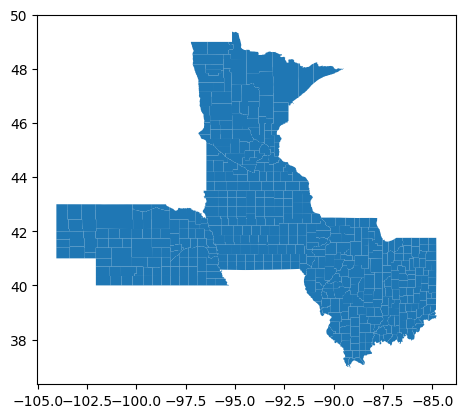

In [106]:
cnty_renamned.plot()

In [107]:
cnty_renamned = cnty_renamned.merge(crop_yield2021, on='County')

In [108]:
cnty_renamned = gpd.GeoDataFrame(
    cnty_renamned, geometry=cnty_renamned['geometry_x'])

In [109]:
cnty_renamned['Value'] = pd.to_numeric(cnty_renamned['Value'])

<AxesSubplot: >

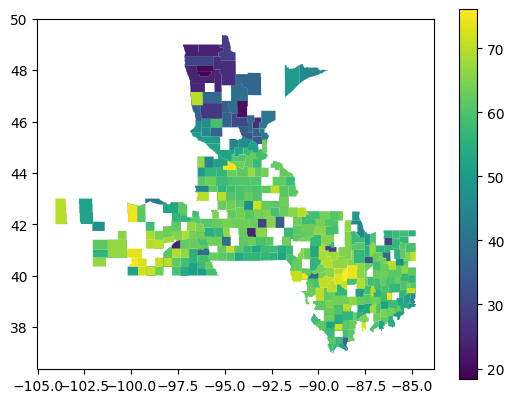

In [110]:
cnty_renamned.plot(column='Value',legend=True)

<AxesSubplot: >

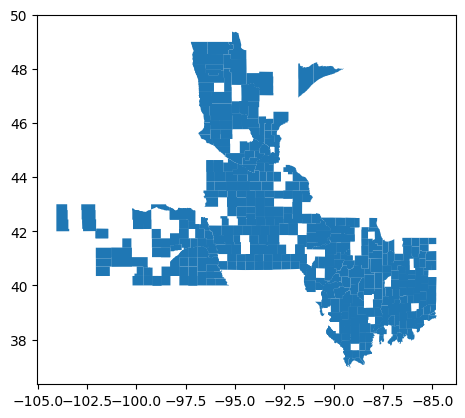

In [113]:
yield_2021.plot()

In [91]:
cdl_layer = rasterio.open("Input/cdl/Iowa_60m/CDL_Soybean_Iowa_60m_2021_clipped.tif")

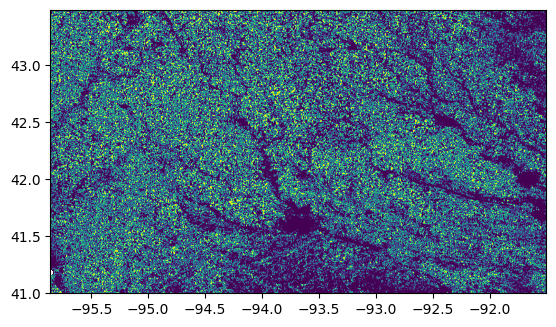

<AxesSubplot: >

In [92]:
show(cdl_layer)

In [128]:
from rasterio import mask
import fiona
with fiona.open("Output/yield_val/yield_2021.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

masked_cdl,masked_transform = mask.mask(cdl_layer, shapes, crop=True)

In [129]:
# masked_cdl  = np.array(masked_cdl[0])
masked_cdl.shape

(1, 4622, 8083)

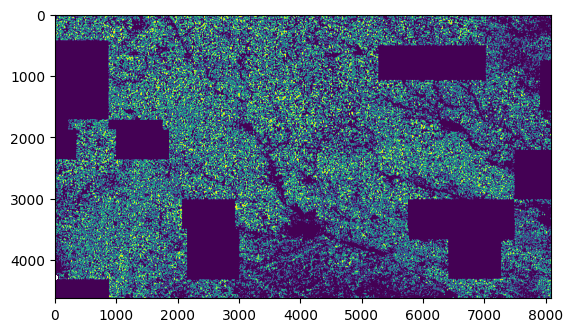

<AxesSubplot: >

In [130]:
show(masked_cdl)

In [132]:
out_meta = cdl_layer.meta
out_meta.update({"driver": "GTiff",
                 "height": masked_cdl.shape[1],
                 "width": masked_cdl.shape[2],
                 "transform": masked_transform})

with rasterio.open("Input/cdl/Iowa_60m/CDL_Soybean_Iowa_60m_2021_clipped_masked.tif", "w", **out_meta) as dest:
    dest.write(masked_cdl)

In [88]:
sent_Iowa = rasterio.open("Input/sentinel/2021/sent2_2021_Iowa_60m/sentinel2_Iowa_60m_clipped.tif")

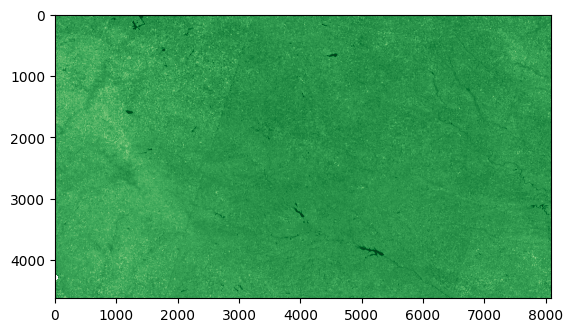

<AxesSubplot: >

In [110]:
show(sent_Iowa.read(8),cmap="Greens_r")

In [113]:
print(f"Minimum Val : {np.nanmin(sent_Iowa.read())}")
print(f"Maximum Val : {np.nanmax(sent_Iowa.read())}")

Minimum Val : 0.0
Maximum Val : 1.1220500469207764


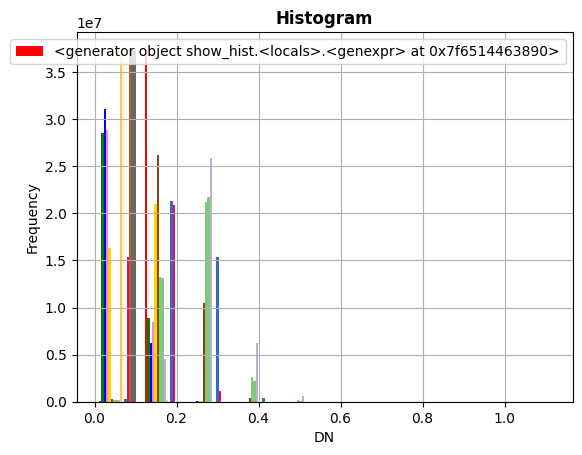

In [116]:
rasterio.plot.show_hist(sent_Iowa,bins=10)

In [17]:
# show(sent_Iowa,cmap='Reds')

In [24]:
sent_Iowa1 = rasterio.open("Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_0-0.tif")

cdl_Iowa1 = rasterio.open("Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_patches/cdl_0-0.tif")

In [23]:
# cdl_Iowa1.close()

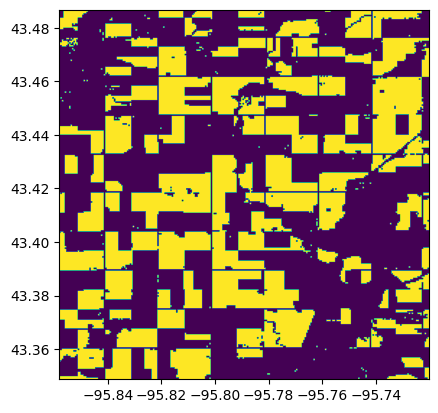

<AxesSubplot: >

In [25]:
show(cdl_Iowa1)

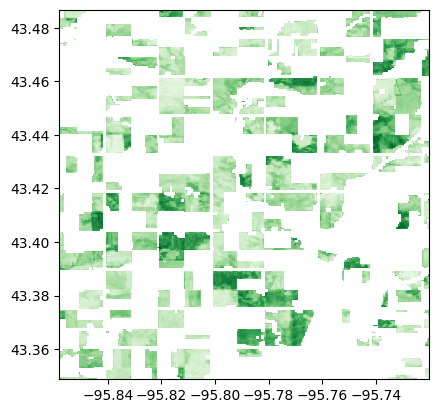

<AxesSubplot: >

In [26]:
show((sent_Iowa1,8),cmap="Greens")

In [27]:
cdl_Iowa1.read().shape

(1, 256, 256)

In [31]:
cdl_arr = cdl_Iowa1.read()[0]
cdl_arr[cdl_arr==0] = np.nan

In [26]:
sent_Iowa1.read().shape

(16, 256, 256)

In [13]:
ss = sent_Iowa1.read()[0:12]

In [14]:
np.min(ss)

0.0009

In [15]:
np.max(ss)

0.5538

In [ ]:
sent_masked1 = (ss*cdl_arr)

In [ ]:
sent_masked1.shape

(12, 256, 256)

In [51]:
cdl = cdl_Iowa1.read(1)
sent_masked = (ss*cdl) 

In [53]:
sent_masked[sent_masked == 0 ] = np.nan

In [42]:
np.count_nonzero(np.isnan(sent_masked1))

NameError: name 'sent_masked5' is not defined

In [21]:
sent_masked.size - np.count_nonzero(sent_masked)

478404

In [161]:
# sent_Iowa2 = rasterio.open("Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_0-512.tif")
# sent_Iowa3 = rasterio.open("Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_0-256.tif")
# sent_Iowa4 = rasterio.open("Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_0-768.tif")
sent_Iowa5 = rasterio.open(r"Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_4352-3840.tif")




In [89]:
# sent_Iowa2.

In [134]:
# y2021_iowa[y2021_iowa["County"]=="CRAWFORD"].plot(column='Value')
# y2021_iowa.groupby(by="County").count() > 1
y2021_iowa["County"].drop_duplicates()


16       MONROE
26      CARROLL
35       BENTON
43      DECATUR
49     FRANKLIN
         ...   
611     DUBUQUE
615    DELAWARE
621         IDA
630       DAVIS
633     WAPELLO
Name: County, Length: 82, dtype: object

In [165]:
y2021_iowa = y2021_iowa.drop_duplicates(subset='County', keep="first")
y2021_iowa

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,watershed_,Watershed,Commodity,Data Item,Domain,Domain Cat,Value,CV (%),geometry,yield_in_kg_per_sqm
16,19,135,00465256,0500000US19135,19135,MONROE,Monroe County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,55.4,2.9,"POLYGON ((-93.09922 41.16087, -92.86977 41.161...",0.372358
26,19,027,00465203,0500000US19027,19027,CARROLL,Carroll County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,67.8,3.2,"POLYGON ((-95.09085 42.21041, -94.85841 42.209...",0.455701
35,19,011,00465195,0500000US19011,19011,BENTON,Benton County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,60.0,1.5,"POLYGON ((-92.29879 42.29753, -92.06477 42.297...",0.403276
43,19,053,00465215,0500000US19053,19053,DECATUR,Decatur County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,61.1,2.5,"POLYGON ((-94.01480 40.89703, -93.90497 40.896...",0.410669
49,19,069,00465223,0500000US19069,19069,FRANKLIN,Franklin County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,52.5,1.6,"POLYGON ((-93.49862 42.90851, -93.02514 42.907...",0.352866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,19,061,00465219,0500000US19061,19061,DUBUQUE,Dubuque County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,69.6,3.1,"POLYGON ((-91.13277 42.64584, -90.89741 42.645...",0.467800
615,19,055,00465216,0500000US19055,19055,DELAWARE,Delaware County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,60.3,1.4,"POLYGON ((-91.60706 42.64397, -91.13277 42.645...",0.405292
621,19,093,00465235,0500000US19093,19093,IDA,Ida County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,64.6,2.2,"POLYGON ((-95.74161 42.56128, -95.38801 42.561...",0.434193
630,19,051,00465214,0500000US19051,19051,DAVIS,Davis County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,55.5,3.8,"POLYGON ((-92.63909 40.89889, -92.17907 40.899...",0.373030


In [74]:
yield_kg_per_sq_m = 27.2/4046.86

In [136]:
#1 Bushel =  27.2 Kg
# 1 acre is 4046.86 sq. m

#1 bu/acre = 27.2/4046.86   = 0.006721260434015508 Kg/sq m

y2021_iowa["yield_in_kg_per_sqm"] = y2021_iowa["Value"]*yield_kg_per_sq_m

<AxesSubplot: >

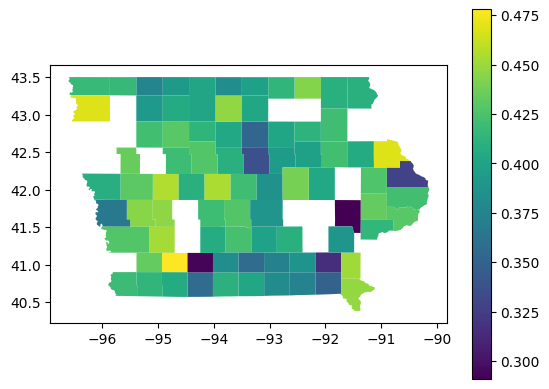

In [137]:
y2021_iowa.plot(column="yield_in_kg_per_sqm",legend=True)

In [162]:
sent_bounds = list(sent_Iowa5.bounds)
y2021_iowa_clip = gpd.clip(y2021_iowa,sent_bounds)

<AxesSubplot: >

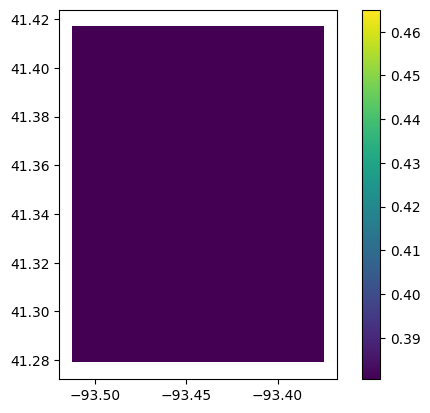

In [163]:
y2021_iowa_clip.plot(column='yield_in_kg_per_sqm',legend=True)

In [164]:

y2021_iowa_clip

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,watershed_,Watershed,Commodity,Data Item,Domain,Domain Cat,Value,CV (%),geometry,yield_in_kg_per_sqm
323,19,181,00465279,0500000US19181,19181,WARREN,Warren County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,62.9,3.8,"POLYGON ((-93.51247 41.27902, -93.51247 41.417...",0.422767


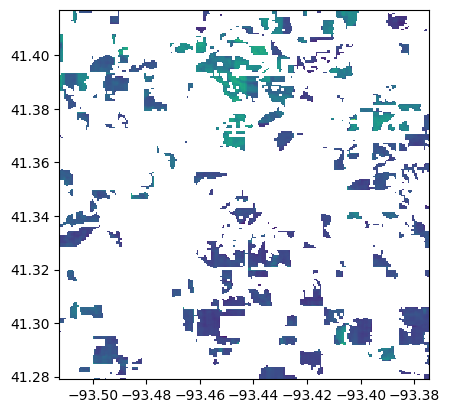

<AxesSubplot: >

In [141]:
show(sent_Iowa5)

In [53]:
cdl_Iowa1 = rasterio.open("Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_patches/cdl_256-2816.tif")


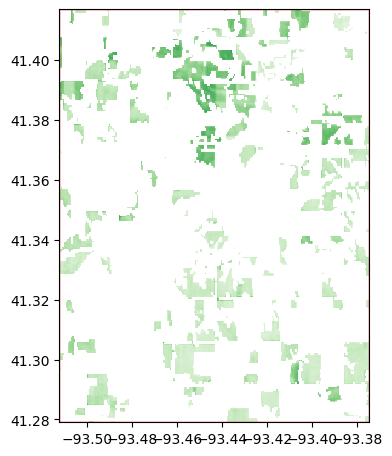

In [142]:
fig, ax = plt.subplots(figsize=(4, 8))
show(sent_Iowa5, ax=ax,cmap="Greens")
# show(sent_Iowa2, ax=ax)
# show(sent_Iowa3, ax=ax)
# show(sent_Iowa4, ax=ax)

y2021_iowa_clip.plot(ax=ax, facecolor='none', edgecolor='r');

In [143]:
from rasterstats import zonal_stats


# cdl_Iowa1 = rasterio.open("Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_patches/cdl_256-2816.tif")

# raster = r"Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_patches/cdl_256-2816.tif"
raster = r"Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_4352-3840.tif"
y2021_iowa_clip["pixel_count"] = [i["count"] for i in zonal_stats(vectors=y2021_iowa_clip['geometry'], raster=raster, categorical=False,stats='count')]

/usr/local/lib/python3.8/dist-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [144]:
y2021_iowa_clip["yield_per_county_in_KG"] = y2021_iowa_clip["yield_in_kg_per_sqm"]*y2021_iowa_clip["pixel_count"]*3600
y2021_iowa_clip

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,Commodity,Data Item,Domain,Domain Cat,Value,CV (%),geometry,yield_in_kg_per_sqm,pixel_count,yield_per_county_in_KG
323,19,181,00465279,0500000US19181,19181,WARREN,Warren County,IA,Iowa,06,...,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,62.9,3.8,"POLYGON ((-93.51247 41.27902, -93.51247 41.417...",0.422767,15396,2.343213e+07


<AxesSubplot: >

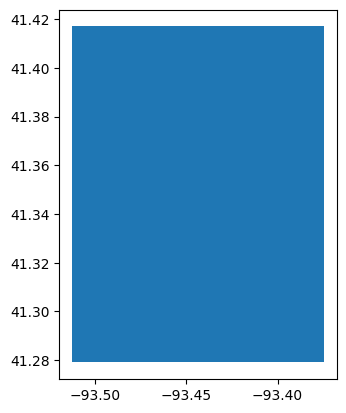

In [192]:
y2021_iowa_clip.plot()

In [45]:
sent_Iowa5.read(1).shape
256*256

65536

In [47]:
np.count_nonzero(~np.isnan(sent_Iowa5.read(1)))

14386

In [40]:
2496+7461+4429

14386

In [ ]:
y2021_iowa_clip

In [145]:
target_yield = y2021_iowa_clip["yield_per_county_in_KG"].sum()
target_yield

23432130.22639775

In [54]:
sent_Iowa5.crs
gt = sent_Iowa5.transform
pixelSizeX = gt[0]
pixelSizeY =-gt[4]
print(pixelSizeX,",",pixelSizeY)

0.0005389891704717129 , 0.0005389891704717129


In [57]:
got = sent_Iowa5.transform.to_gdal()
print(got)

(-95.72016476241244, 0.0005389891704717129, 0.0, 41.9689307479504, 0.0, -0.0005389891704717129)


In [60]:
pixelSizeX_got = got[1]*111.1*1000
pixelSizeY_got =-got[5]*111.1*1000
print(pixelSizeX_got,",",pixelSizeY_got)

59.881696839407304 , 59.881696839407304


In [50]:
print(sent_Iowa5.crs.linear_units)

unknown


In [161]:
# for i,j in rast_feat.shapes(sent_Iowa5.read(1)):
#     print(i,j)

In [157]:
print(aa)

<generator object shapes at 0x7f6d3d2a4f20>


In [ ]:
#First compute the area of the masked patch
#THen seggregate the area based on the regions within the county


In [6]:
# # if cdl_layer is None:
# #     print('Unable to open %s' % src_fileName)
# #     sys.exit(1)

# srcband = cdl_layer.GetRasterBand(1)
# dst_layername = "PolyFtr"
# drv = ogr.GetDriverByName("ESRI Shapefile")
# dst_ds = drv.CreateDataSource(dst_layername + ".shp")
# dst_layer = dst_ds.CreateLayer(dst_layername, srs = None)
# newField = ogr.FieldDefn('Area', ogr.OFTInteger)
# dst_layer.CreateField(newField)
# gdal.Polygonize(srcband, None, dst_layer, 0, [],callback=None )

In [ ]:
"Output/"

In [227]:
yield_inp = gpd.read_file("Output/yield_val/yield_2021.shp")
print(yield_inp.shape)
# yield_inp = yield_inp.drop_duplicates(subset='County', keep="first")
#1 Bushel =  27.2 Kg
# 1 acre is 4046.86 sq. m
print(yield_inp.shape)
yield_kg_per_sq_m = 27.2/4046.86
yield_inp["yield_in_kg_per_sqm"] = yield_inp["Value"]*yield_kg_per_sq_m


(640, 33)
(640, 33)


<AxesSubplot: >

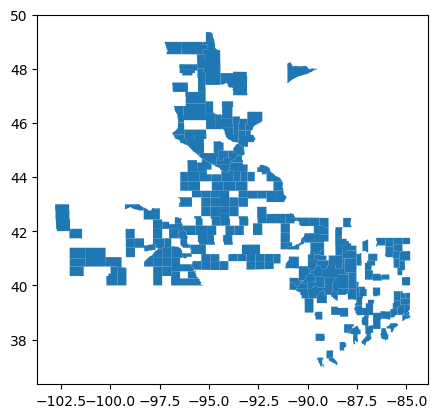

In [220]:
# yield_inp.plot()

In [228]:
# fig,ax = plt.subplots(figsize=(10,6))

yield_inp[yield_inp["County"] == "WARREN"]
# show(patch_src,ax=ax)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,watershed_,Watershed,Commodity,Data Item,Domain,Domain Cat,Value,CV (%),geometry,yield_in_kg_per_sqm
322,17,187,01785134,0500000US17187,17187,WARREN,Warren County,IL,Illinois,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,62.9,3.8,"POLYGON ((-90.78519 41.06875, -90.55022 41.064...",0.422767
323,19,181,00465279,0500000US19181,19181,WARREN,Warren County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,62.9,3.8,"POLYGON ((-93.79061 41.51192, -93.54824 41.511...",0.422767
324,18,171,00450400,0500000US18171,18171,WARREN,Warren County,IN,Indiana,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,62.9,3.8,"POLYGON ((-87.53113 40.17003, -87.53083 40.191...",0.422767


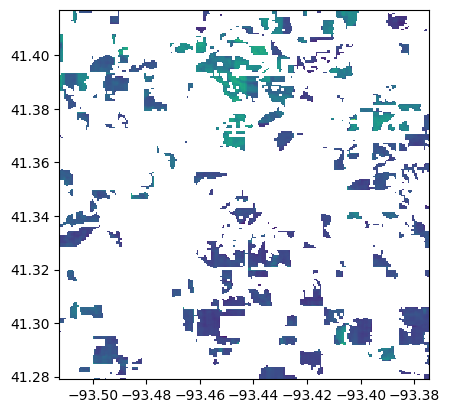

<AxesSubplot: >

In [229]:
show(patch_src)

In [230]:
i_patch= r"Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_4352-3840.tif"
print(i_patch)
patch_src = rio.open(i_patch)
patch_bounds = list(patch_src.bounds)
print(patch_bounds)
yield_inp_clip = gpd.clip(yield_inp,patch_bounds)
yield_inp_clip

Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_4352-3840.tif
[-93.51246512016031, 41.27902460974661, -93.37448389251955, 41.417005837387364]


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,watershed_,Watershed,Commodity,Data Item,Domain,Domain Cat,Value,CV (%),geometry,yield_in_kg_per_sqm
323,19,181,00465279,0500000US19181,19181,WARREN,Warren County,IA,Iowa,06,...,00000000,None,SOYBEANS,"SOYBEANS - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,62.9,3.8,"POLYGON ((-93.51247 41.27902, -93.51247 41.417...",0.422767


In [155]:
import glob
import rasterio as rio
def set_target_for_patches():
    yield_inp = gpd.read_file("Output/yield_val/yield_2021.shp")
    yield_inp = yield_inp.drop_duplicates(subset='County', keep="first")
    #1 Bushel =  27.2 Kg
    # 1 acre is 4046.86 sq. m
    yield_kg_per_sq_m = 27.2/4046.86
    yield_inp["yield_in_kg_per_sqm"] = yield_inp["Value"]*yield_kg_per_sq_m
    print(yield_inp.head())
    patch_files_path = 'Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/'
    patch_files = glob.glob(patch_files_path+"*.tif")
    target_dict = dict()
    for i_patch in patch_files:
        i_patch= r"Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_4352-3840.tif"
        print(i_patch)
        patch_src = rio.open(i_patch)
        patch_bounds = list(patch_src.bounds)
        print(patch_bounds)
        yield_inp_clip = gpd.clip(yield_inp,patch_bounds)
        print(yield_inp_clip)
        yield_inp_clip["pixel_count"] = [i["count"] for i in zonal_stats(vectors=yield_inp_clip['geometry'], raster=i_patch, categorical=False,stats='count')]
        yield_inp_clip["yield_per_county_in_KG"] = yield_inp_clip["yield_in_kg_per_sqm"]*yield_inp_clip["pixel_count"]*3600
        target_yield = yield_inp_clip["yield_per_county_in_KG"].sum()
        target_key = i_patch.split("/")[-1].split(".")[0]
        target_dict[target_key] = target_yield
        patch_src.close()
    print(target_dict)

In [246]:
# set_target_for_patches()
aa = np.zeros((12, 256, 256))

In [247]:
aa[aa==0]=np.nan
aa.shape

(12, 256, 256)

In [240]:
aa[0][0][0] = 1

In [248]:
np.isnan(aa).all()

True

In [4]:
import geopandas as gpd
import os

In [5]:
os.getcwd()

'/home/jovyan/MSC_Thesis/MSc_Thesis_2023'

In [6]:
target = gpd.read_file("Input/sentinel/2021/Target/Iowa_2021.shp")

In [11]:
target.shape

(539, 3)

In [12]:
target.head()

,patch_name,yld_kg_sqm,geometry
0,sentinel_5632-1536,2.341497e+07,"POLYGON ((-92.68458 42.52086, -92.82256 42.520..."
1,sentinel_4864-2048,1.959354e+07,"POLYGON ((-93.09852 42.24489, -93.23650 42.244..."
2,sentinel_3328-3328,2.755502e+07,"POLYGON ((-93.92641 41.55499, -94.06439 41.554..."
3,sentinel_1536-2304,2.688001e+07,"POLYGON ((-94.89228 42.10691, -95.03026 42.106..."
4,sentinel_7424-2816,8.338986e+06,"POLYGON ((-91.71871 41.83095, -91.85669 41.830..."


In [42]:
aa = list()
aa.append(float(target.query("patch_name == 'sentinel_1536-2304'")["yld_kg_sqm"]))
print(aa)


[26880006.16774487]


<AxesSubplot: >

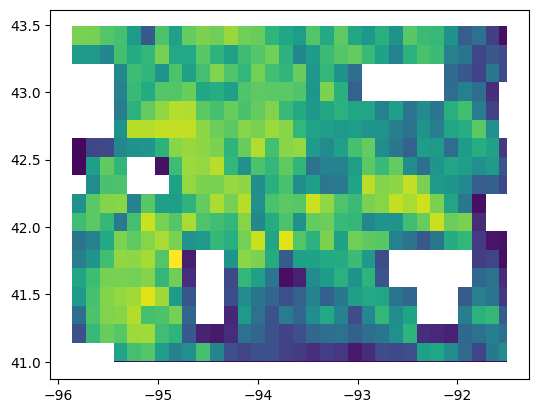

In [10]:
target.plot(column='yld_kg_sqm')